LSTM seaborn data

WBC CLASSIFICATION

In [1]:
!unzip "/content/drive/My Drive/blood-cells.zip"

Archive:  /content/drive/My Drive/blood-cells.zip
replace blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00000.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace blood-cells/dataset-master/dataset-master/Annotations/BloodImage_00001.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import keras
import warnings
warnings.filterwarnings('ignore')
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Softmax,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,LSTM,Embedding
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import re
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import random as rn
from sklearn.cluster import KMeans
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils  import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.svm import SVC
import pickle

In [0]:
image_path=r'/content/blood-cells/dataset2-master/dataset2-master/images/TRAIN'

In [0]:
classes=os.listdir(image_path)

In [4]:
classes

['LYMPHOCYTE', 'EOSINOPHIL', 'MONOCYTE', 'NEUTROPHIL']

In [0]:
images=[]
labels=[]
for c in classes:
  for imgs in os.listdir(os.path.join(image_path,c)):
    images.append(os.path.join(image_path,c,imgs))
    l=os.path.join(image_path,c,imgs).split('/')[-2]
    labels.append(l)

In [6]:
len(images),len(labels)

(9957, 9957)

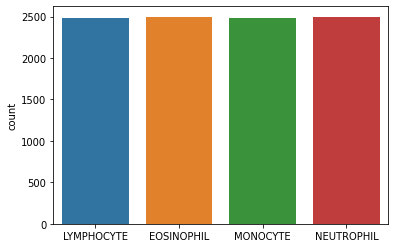

In [7]:
sns.countplot(labels)

In [8]:
labels.count('MONOCYTE')

2478

In [0]:
neu=labels.count('NEUTROPHIL')

In [0]:
lym=labels.count('LYMPHOCYTE')

In [11]:
lym

2483

In [0]:
data=list(zip(images,labels))
rn.shuffle(data)
X,Y=zip(*data)
#print(len(abels))

In [0]:
image_array=[]
for imgs in X[:3000]:
    img=image.load_img(imgs,target_size=(224,224))
    img=image.img_to_array(img)
    #img_grey=rgb2grey(img)
    #img_grey=img_grey.reshape(img_grey.shape[0],img_grey.shape[1],1)
    img=img.astype('float32')
    image_array.append(img)

In [0]:
Image_array=np.array(image_array)

In [15]:
Image_array.shape 

(3000, 224, 224, 3)

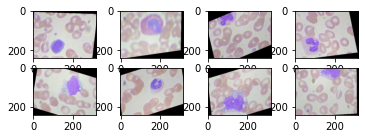

In [16]:
i=0
for imgs in X[:8]:
  plt.subplot(4,4,i+1)
  img=Image.open(imgs)
  img=np.asarray(img)
  plt.imshow(img)
  i+=1
plt.show()

In [0]:
Y=np.array(Y)
Y1=LabelEncoder().fit_transform(Y)
Y_cat=to_categorical(Y1,4)

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(Image_array,Y_cat[:3000],stratify=Y_cat[:3000],test_size=0.2,random_state=42)

In [19]:
X_train.shape,X_test.shape

((2400, 224, 224, 3), (600, 224, 224, 3))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
out=model.output

In [0]:
print(out.shape)

(?, 186624)


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)           

In [0]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history=model.fit(X_train, Y_train,epochs=30,batch_size=64,validation_data=(X_test,Y_test),verbose=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 15s 6ms/sample - loss: 5.7454 - acc: 0.2692 - val_loss: 495.8049 - val_acc: 0.2400
Epoch 2/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3828 - acc: 0.2546 - val_loss: 147.2150 - val_acc: 0.2400
Epoch 3/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3874 - acc: 0.2592 - val_loss: 15.9174 - val_acc: 0.2483
Epoch 4/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3854 - acc: 0.2658 - val_loss: 2.6160 - val_acc: 0.2783
Epoch 5/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3850 - acc: 0.2679 - val_loss: 2.0231 - val_acc: 0.2600
Epoch 6/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3787 - acc: 0.2667 - val_loss: 1.3821 - val_acc: 0.2650
Epoch 7/30
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.3781 - acc: 0.2671 - val_loss: 1.3842 - val_acc: 0.

In [21]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
vgg.trainable=False

In [0]:
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
filepath="weights-improvement-WBC-vgg16_2-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [74]:
history=model.fit(X_train, Y_train,epochs=50,batch_size=64,callbacks=callbacks_list,validation_data=(X_test,Y_test),verbose=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.8424 - acc: 0.5891
Epoch 00001: val_acc improved from 0.58667 to 0.59667, saving model to weights-improvement-WBC-vgg16_2-01-0.60.hdf5
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.8399 - acc: 0.5908 - val_loss: 0.8713 - val_acc: 0.5967
Epoch 2/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.8439 - acc: 0.6018
Epoch 00002: val_acc did not improve from 0.59667
2400/2400 [==============================] - 15s 6ms/sample - loss: 0.8441 - acc: 0.6025 - val_loss: 0.9146 - val_acc: 0.5500
Epoch 3/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.7962 - acc: 0.6216
Epoch 00003: val_acc improved from 0.59667 to 0.60333, saving model to weights-improvement-WBC-vgg16_2-03-0.60.hdf5
2400/2400 [==============================] - 15s 6ms/sample - loss: 0.7962 - acc: 0.6208 - val_loss: 0.9592 - val_acc: 0.6033
Epoch 4/50
236

In [0]:
model.save('WBC-75%.h5')

In [0]:
model.load_weights('weights-improvement-WBC-vgg16_2-28-0.75.hdf5')

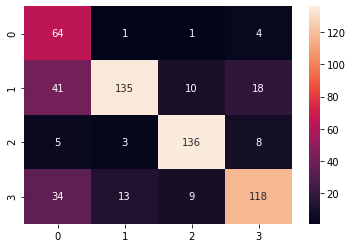

In [0]:
sns.heatmap(confusion_matrix(model.predict_classes(X_test),np.argmax(Y_test,axis=1)),annot=True,fmt='d')

In [0]:
train_accuracy=history.history['acc']
val_accuracy=history.history['val_acc']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

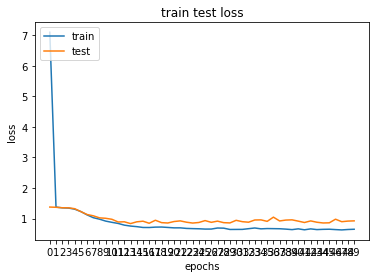

In [0]:
def plot_loss(val_loss,train_loss):
    epochs=[i for i in range(50)]
    plt.plot(epochs,train_loss)
    plt.plot(epochs,val_loss)
    plt.xticks(epochs)
    plt.title('train test loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'test'], loc='upper left')
plot_loss(val_loss,train_loss)

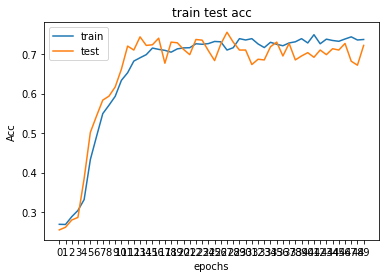

In [0]:
def plot_loss(val_loss,train_loss):
    epochs=[i for i in range(50)]
    plt.plot(epochs,train_accuracy)
    plt.plot(epochs,val_accuracy)
    plt.xticks(epochs)
    plt.title('train test acc')
    plt.ylabel('Acc')
    plt.xlabel('epochs')
    plt.legend(['train', 'test'], loc='upper left')
plot_loss(val_loss,train_loss)

In [0]:
res=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [0]:
res.trainable=False

In [0]:
model1=Sequential()
model1.add(res)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(4, activation = 'softmax'))

In [0]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
filepath="weights-improvement-WBC-resnet_2-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
history1=model1.fit(X_train, Y_train,epochs=50,batch_size=64,callbacks=callbacks_list,validation_data=(X_test,Y_test),verbose=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2368/2400 [============================>.] - ETA: 0s - loss: 5.9304 - acc: 0.2791
Epoch 00001: val_acc improved from -inf to 0.24833, saving model to weights-improvement-WBC-resnet_2-01-0.25.hdf5
2400/2400 [==============================] - 29s 12ms/sample - loss: 5.8698 - acc: 0.2788 - val_loss: 1.3792 - val_acc: 0.2483
Epoch 2/50
2368/2400 [============================>.] - ETA: 0s - loss: 1.3411 - acc: 0.3138
Epoch 00002: val_acc improved from 0.24833 to 0.30167, saving model to weights-improvement-WBC-resnet_2-02-0.30.hdf5
2400/2400 [==============================] - 23s 10ms/sample - loss: 1.3481 - acc: 0.3150 - val_loss: 1.6210 - val_acc: 0.3017
Epoch 3/50
2368/2400 [============================>.] - ETA: 0s - loss: 1.2200 - acc: 0.4096
Epoch 00003: val_acc did not improve from 0.30167
2400/2400 [==============================] - 22s 9ms/sample - loss: 1.2207 - acc: 0.4096 - val_loss: 1.8261 - val_acc: 0.2817
Epoch 4/50
23

KeyboardInterrupt: ignored

Image segmentation


In [0]:
def image_flatten(image):
    Image_flatten=[]
    for img in image:
        img_flatten=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
        Image_flatten.append(img_flatten)
    return np.array(Image_flatten)

In [0]:
X_train_flatten=image_flatten(X_train)

In [0]:
X_test_flatten=image_flatten(X_test)

In [25]:
X_train_flatten.shape,X_test_flatten.shape

((2400, 50176, 3), (600, 50176, 3))

In [0]:
def segmentation(X):
  segmented_image=[]
  for im in X:
        km=KMeans(n_clusters=5).fit(im)
        seg=km.cluster_centers_[km.labels_]
        img_seg=seg.reshape(224,224,3)
        segmented_image.append(img_seg)
  return np.array(segmented_image)

In [0]:
X_train_seg=segmentation(X_train_flatten)
X_test_seg=segmentation(X_test_flatten)

In [30]:
X_train_seg.shape

(2400, 224, 224, 3)

In [0]:
pickle.dump(X_train_seg,open('X_train_seg.pkl','wb'))


In [0]:
del X_train_seg

In [0]:
pickle.dump(X_test_seg,open('X_test_seg.pkl','wb'))


In [0]:
del X_test_seg

In [42]:
import gc
gc.collect()

535

In [0]:
X_train_seg=pickle.load(open('/content/X_train_seg.pkl','rb'))

In [0]:
del x1

In [0]:
X_test_seg=pickle.load(open('/content/X_test_seg.pkl','rb'))

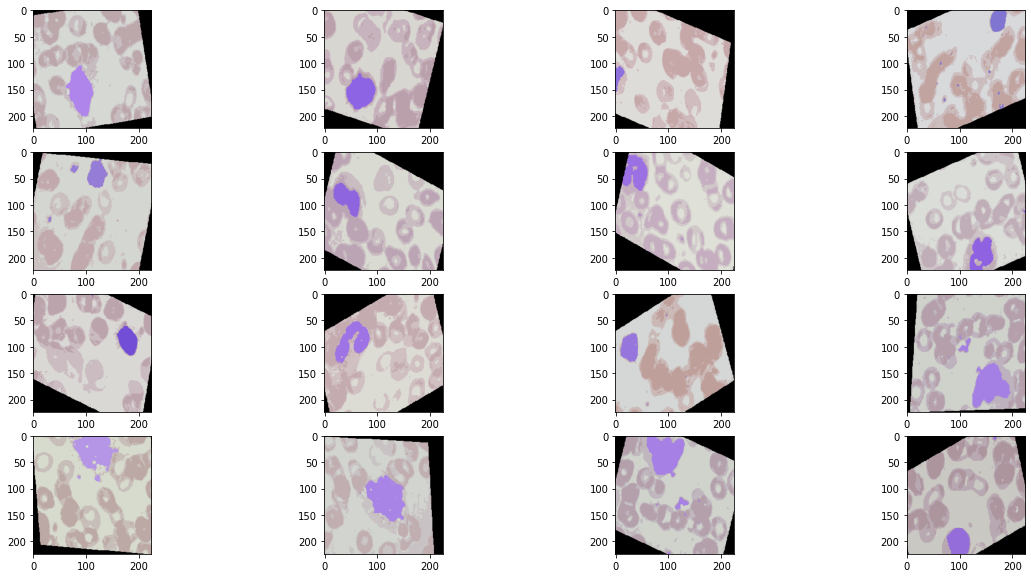

In [47]:
i=0
plt.figure(figsize=(20,10))
for seg in X_train_seg[:16]:
    seg=seg/255
    plt.subplot(4,4,i+1)
    plt.imshow(seg)
    i+=1
plt.show()

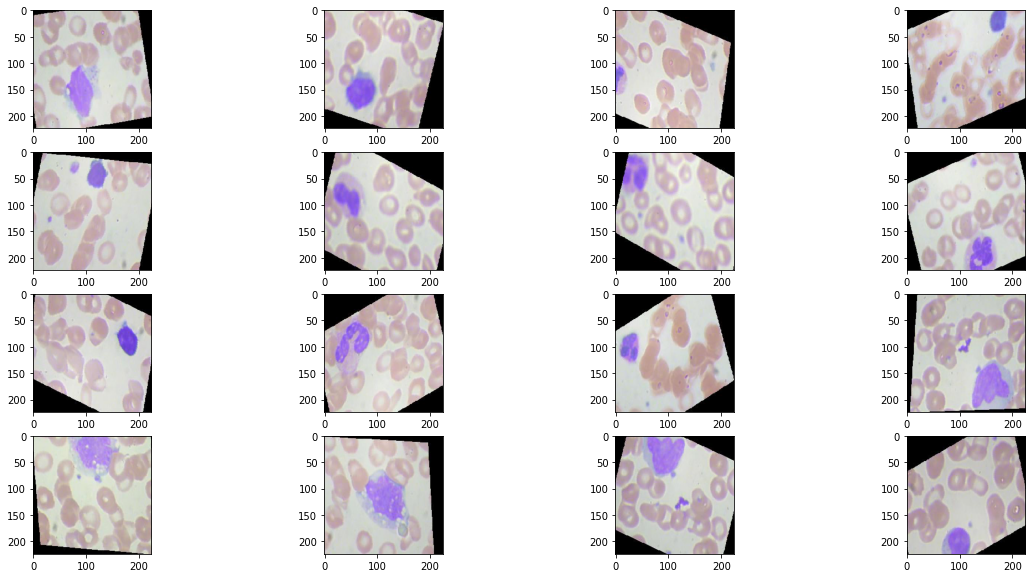

In [48]:
i=0
plt.figure(figsize=(20,10))
for seg in X_train[:16]:
    seg=seg/255
    plt.subplot(4,4,i+1)
    plt.imshow(seg)
    i+=1
plt.show()

In [0]:
del X_train
del X_test

In [0]:
del X_train_flatten
del X_test_flatten

In [0]:
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [0]:
filepath="weights-improvement-WBC-vgg16_seg-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [63]:
history=model.fit(X_train_seg, Y_train,epochs=50,batch_size=64,callbacks=callbacks_list,validation_data=(X_test_seg,Y_test),verbose=True)

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.6247 - acc: 0.6833
Epoch 00001: val_acc did not improve from 0.66167
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.6249 - acc: 0.6842 - val_loss: 1.1554 - val_acc: 0.6517
Epoch 2/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.6576 - acc: 0.6778
Epoch 00002: val_acc did not improve from 0.66167
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.6566 - acc: 0.6775 - val_loss: 0.9220 - val_acc: 0.6333
Epoch 3/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.6413 - acc: 0.6761
Epoch 00003: val_acc improved from 0.66167 to 0.66500, saving model to weights-improvement-WBC-vgg16_seg-03-0.67.hdf5
2400/2400 [==============================] - 14s 6ms/sample - loss: 0.6405 - acc: 0.6767 - val_loss: 0.8868 - val_acc: 0.6650
Epoch 4/50
2368/2400 [============================>.] - ETA: 0s - loss: 0.6091

In [22]:
input1=vgg(X_train)
input2=Flatten()(input1)
input3=Embedding(200,128)(input2)
input4=LSTM(64)(input3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
del model3

In [0]:
vgg.trainable=False
model3=Sequential()
model3.add(vgg)
model3.add(Flatten())
model3.add(Embedding(100,64))
model3.add(LSTM(64))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(4, activation = 'softmax'))


In [29]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 25088, 64)         6400      
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [0]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [0]:
filepath="weights-improvement-WBC-vgg16_LSTM-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
history=model3.fit(X_train, Y_train,epochs=50,batch_size=100,callbacks=callbacks_list,validation_data=(X_test,Y_test),verbose=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2400 samples, validate on 600 samples
Epoch 1/50


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
